### 数据导入

In [1]:
import numpy as np
import pandas as pd

data = pd.read_excel("rat_eye.xlsx",header = None).to_numpy()
label = np.asarray(data[:,0],dtype=str)
mat = np.asarray(data[:,1:],dtype=float)
genpos = np.where(label == "1389163_at")
print(label.shape)
print(mat.shape)
print(genpos)


(18976,)
(18976, 120)
(array([7854], dtype=int64),)


In [2]:
hyb = "1389163_at"

In [86]:
x = np.delete(mat.T,genpos,axis=1)
x = np.asarray(x,dtype=float)

y = mat[genpos[0]].T
y = np.asarray(y,dtype=float)
label = np.delete(label,np.where(label == "1389163_at"))


data = np.column_stack((x,y))

print(x.shape)
print(label.shape)
print(y.shape)
print(mat.shape)

(120, 18975)
(18975,)
(120, 1)
(18976, 120)


In [4]:
full_label = np.column_stack((label.reshape(1,-1),np.asarray("1389163_at")))
full_label = full_label.reshape(-1,1)

In [5]:
full_label.shape

(18976, 1)

In [438]:
label.shape

(18975,)

### 特征选择-Filter过滤法（方差）

过滤方法通常用作预处理步骤，特征选择完全独立于任何机器学习算法。它是根据各种统计检验中的分数以及相关性的各项指标来选择特征。



VarianceThreshold

这是通过特征本身的方差来筛选特征的类。比如一个特征本身的方差很小，就表示样本在这个特征上基本没有差异，可能特征中的大多数值都一样，甚至整个特征的取值都相同，那这个特征对于样本区分没有什么作用。所以无论接下来的特征工程要做什么，都要优先消除方差为0的特征。

VarianceThreshold有重要参数threshold，表示方差的阈值，表示舍弃所有方差小于threshold的特征，不填默认为0，即删除所有的记录都相同的特征。

- 实际处理

In [299]:
from sklearn.feature_selection import VarianceThreshold
variance_selector =  VarianceThreshold(threshold=0.02)
selected_data = variance_selector.fit_transform(pd.DataFrame(data))#np.column_stack((x,y))))
selected_label = full_label[variance_selector.get_support()]
print(selected_data.shape)
print(selected_label.shape)


(120, 18712)
(18712, 1)


In [9]:
selected_data[:,-1]

array([8.384, 8.268, 8.392, 8.508, 8.358, 8.507, 8.328, 8.117, 8.381,
       8.337, 8.438, 8.42 , 8.365, 8.143, 8.51 , 8.356, 8.374, 8.429,
       8.561, 8.424, 8.315, 8.383, 8.203, 8.375, 8.401, 8.284, 8.343,
       8.405, 8.417, 8.346, 8.494, 8.168, 8.426, 8.428, 8.381, 8.419,
       8.569, 8.638, 8.352, 8.328, 8.297, 8.309, 8.258, 8.545, 8.513,
       8.576, 8.472, 8.335, 8.52 , 8.309, 8.454, 8.43 , 8.417, 8.618,
       8.293, 8.352, 8.251, 7.381, 8.444, 8.515, 8.239, 8.416, 8.405,
       8.372, 8.355, 8.336, 8.445, 8.482, 8.394, 8.314, 8.325, 8.062,
       8.518, 8.295, 8.503, 8.35 , 8.355, 8.429, 8.462, 8.457, 8.453,
       8.403, 8.517, 8.429, 8.252, 8.539, 8.378, 8.288, 8.321, 8.559,
       8.605, 8.459, 8.512, 8.363, 8.422, 8.359, 8.406, 8.29 , 8.273,
       8.39 , 8.296, 8.457, 8.475, 8.322, 8.415, 8.442, 8.327, 8.475,
       8.448, 8.553, 8.333, 8.489, 8.202, 8.186, 8.442, 8.411, 8.476,
       8.514, 8.591, 8.753])

In [10]:
data = selected_data
label = selected_label

### 标准化

In [51]:
from sklearn import preprocessing
zscore = preprocessing.StandardScaler()

In [52]:
# 按行标准化
data = zscore.fit_transform(data)
print(data.shape)

(120, 18976)


In [53]:
data

array([[-0.49171227,  0.08426901,  0.52746098, ..., -0.32792026,
        -0.45111502, -0.0476243 ],
       [ 0.43766086, -0.23537207, -0.73451922, ...,  0.19494225,
        -0.40704289, -0.85312894],
       [-0.46838072,  0.37485182, -1.09909127, ...,  0.61222675,
         0.17470929,  0.00792774],
       ...,
       [-1.00111762, -0.06102239,  0.67702901, ...,  0.25024501,
         0.88427065,  0.85509641],
       [-1.7049525 , -1.90829878,  0.85464103, ..., -1.46916823,
        -0.71114062,  1.38978483],
       [-2.10158873, -0.12329013,  0.81724903, ..., -1.72054443,
        -1.1650836 ,  2.51471373]])

### KS检验

In [283]:
import matplotlib.pyplot as plt

In [284]:
sumrat = np.sum(data,axis=1)

In [285]:
sumrat.shape

(120,)

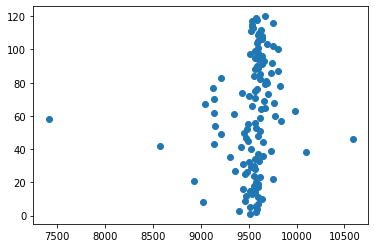

In [286]:
# 散点图
plt.scatter(sumrat,range(1,121))
plt.show()

In [287]:
# 均值
print(np.mean(sumrat))
# 方差
print(np.var(sumrat))
# 标准差
print(np.std(sumrat))

mu = np.mean(sumrat)
sig = np.std(sumrat)


9537.01800329838
85324.35892883317
292.103336045368


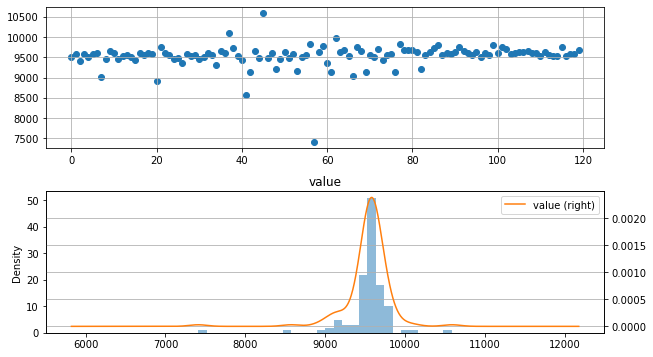

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ratdf = pd.DataFrame(sumrat,columns = ['value'])

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1) # 创建子图1
ax1.scatter(ratdf.index, ratdf.values)
plt.grid()
# # 绘制数据分布图
ax2 = fig.add_subplot(2,1,2) # 创建子图2
ratdf.hist(bins = 30,alpha = 0.5,ax = ax2)
ratdf.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()
# 绘制直方图# 呈现较明显的正太性

In [289]:
from scipy import stats
stats.kstest(ratdf['value'],'norm', (ratdf['value'].mean(), ratdf['value'].std()))

KstestResult(statistic=0.2243637669772785, pvalue=8.667609394086915e-06)

In [290]:
ks = []
for i in range(data.shape[1]):
    ratdf = pd.DataFrame(data[:,i],columns = ['value'])

    ksret = stats.kstest(ratdf['value'],'norm', (ratdf['value'].mean(), ratdf['value'].std()))
    ks.append(ksret)
    if i%1000==0:
        print(i)
    # .kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
    # 结果返回两个值：statistic → D值，pvalue → P值# p值大于0.05，为正态分布

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000


In [494]:
allgen_ks = [it[1] for it in ks]
allgen_ks = np.array(allgen_ks)
(allgen_ks>0.05)[-50:-1]

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True])

In [259]:
allgen_ks

array([0.46695848, 0.4276094 , 0.36290403, ..., 0.87735389, 0.25781912,
       0.08412386])

In [260]:
ks_pass_gens = np.where(allgen_ks>0.05)[0].tolist()
ks_fail_gens = list(set(range(0,18976)) ^ set(ks_pass_gens))

In [279]:
data

array([[7.295, 9.812, 9.331, ..., 4.938, 4.644, 8.384],
       [7.534, 9.735, 9.196, ..., 5.042, 4.654, 8.268],
       [7.301, 9.882, 9.157, ..., 5.125, 4.786, 8.392],
       ...,
       [7.164, 9.777, 9.347, ..., 5.053, 4.947, 8.514],
       [6.983, 9.332, 9.366, ..., 4.711, 4.585, 8.591],
       [6.881, 9.762, 9.362, ..., 4.661, 4.482, 8.753]])

### Q1 互信息

In [9]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression

mut_selector = SelectKBest(score_func=mutual_info_regression, k=1000)
mut_selector.fit_transform(data[:,:-1], data[:,-1])

print('scores_:\n',mut_selector.scores_)
print('pvalues_:',mut_selector.pvalues_)
print('selected index:',mut_selector.get_support(True))
print('after transform:\n',mut_selector.transform(data[:,:-1]))



scores_:
 [0.15219915 0.06325844 0.15308966 ... 0.00652263 0.         0.05522678]
pvalues_: None
selected index: [   16    24    26    39    49    61    82   147   199   232   254   283
   300   327   350   380   435   441   463   540   545   570   593   651
   691   709   776   869   882   920   938   948   967  1008  1069  1094
  1095  1107  1126  1205  1207  1214  1240  1279  1396  1445  1457  1494
  1525  1573  1579  1664  1737  1747  1754  1761  1782  1784  1797  1819
  1843  1860  1894  1896  1898  1973  1990  1993  2008  2100  2108  2113
  2156  2164  2165  2193  2321  2347  2398  2402  2415  2450  2458  2463
  2480  2492  2509  2528  2630  2641  2642  2644  2649  2655  2663  2668
  2681  2687  2693  2725  2738  2766  2775  2778  2788  2797  2816  2833
  2836  2841  2854  2870  2875  2886  2890  2899  2900  2906  2924  2933
  2946  2961  2971  2974  2975  2985  2988  2993  2994  3011  3035  3036
  3037  3038  3049  3062  3079  3089  3093  3108  3137  3149  3154  3171
  3191  321

In [10]:
mut_selector.get_support(True)[:20]

array([ 16,  24,  26,  39,  49,  61,  82, 147, 199, 232, 254, 283, 300,
       327, 350, 380, 435, 441, 463, 540], dtype=int64)

In [11]:
data[:,mut_selector.get_support(True)] == mut_selector.transform(data[:,:-1])

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [12]:
mut_selected_gen = mut_selector.get_support(True)

In [13]:
mut_selector.scores_.shape

(18975,)

### Q1 方差分析

f_regression：相关系数，计算每个变量与目标变量的相关系数，然后计算出F值和P值；基于线性回归分析来计算统计指标，给出各特征的回归系数，系数比较大的特征更重要。

In [414]:
from sklearn.feature_selection import SelectKBest,f_regression

f_selector = SelectKBest(score_func=f_regression, k=1000)
f_selector.fit_transform(data[:,:-1], data[:,-1])

print('scores_:\n',f_selector.scores_)
print('pvalues_:',f_selector.pvalues_)
print('selected index:',f_selector.get_support(True))
print('after transform:\n',f_selector.transform(data[:,:-1]))

scores_:
 [31.08583357  0.54121954 29.67021316 ... 14.09255465  5.19988522
 33.46204573]
pvalues_: [1.58855445e-07 4.63387561e-01 2.83756750e-07 ... 2.71594094e-04
 2.43836662e-02 6.08298343e-08]
selected index: [   15    16    21    24    28    34    42   104   120   141   174   177
   232   252   254   305   313   327   348   350   360   370   378   380
   441   499   528   545   570   642   691   709   825   842   869   914
   926   997  1044  1065  1139  1183  1184  1297  1318  1367  1450  1527
  1561  1621  1664  1708  1733  1778  1782  1784  1837  1868  1872  1893
  1901  1918  2034  2069  2084  2094  2113  2131  2186  2213  2228  2234
  2318  2356  2398  2401  2403  2425  2434  2435  2437  2449  2450  2481
  2523  2551  2573  2574  2580  2591  2610  2624  2636  2639  2641  2642
  2649  2655  2659  2662  2668  2674  2691  2693  2701  2711  2725  2733
  2734  2748  2775  2831  2833  2836  2841  2854  2875  2878  2887  2890
  2899  2900  2903  2906  2924  2942  2946  2947  2970  29

In [415]:
data[:,f_selector.get_support(True)] == f_selector.transform(data[:,:-1])

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [416]:
f_selected_gen = f_selector.get_support(True)

### Q1 相关系数

In [14]:
dim = data[1]
sample = data[0]

df = pd.DataFrame(data)

In [15]:
print(df.shape)
print(df.head())

(120, 18976)
      0         1         2         3         4         5         6      \
0 -0.491712  0.084269  0.527461 -0.084829  1.478320  0.651432 -0.149937   
1  0.437661 -0.235372 -0.734519  1.294720 -0.594186 -1.058537  0.169293   
2 -0.468381  0.374852 -1.099091 -0.628827  0.121403  0.513320 -0.480174   
3 -0.837797 -0.251977 -0.052115 -1.713266  1.856367  0.717200  1.055429   
4  0.208234 -0.467838 -1.295399  0.384502 -1.579808 -0.532392 -0.298544   

      7         8         9      ...     18966     18967     18968     18969  \
0 -0.212957 -0.041822 -0.307467  ...  0.121440  0.079444  0.924923 -0.521143   
1  0.643244  0.953384  0.374969  ...  1.394292  0.451587  0.706464 -1.160253   
2  0.028713 -0.027605 -0.895946  ... -0.501997  1.623148  0.390912  0.177696   
3  0.650149  0.761451  0.894215  ... -1.800825  1.182090  0.291122  0.153804   
4  0.532767 -0.219538  0.290901  ... -0.169497 -0.618898  0.930317 -1.028847   

      18970     18971     18972     18973     18974    

In [16]:
R = df.corr()
Rmatrix = R.to_numpy()

In [17]:
print(Rmatrix[-1])

[-0.45662856 -0.06756971  0.44824338 ... -0.20544318 -0.47002865
  1.        ]


In [ ]:
# R聚类
# dim = mat.shape[0]
# sample = mat.shape[1]
# # 相关矩阵 dim*dim
# R = np.zeros((dim,dim),dtype=np.float16)
# for j in range(dim):
#     if j%100 == 0:
#         print(j)
#     for k in range(j):
#         # 行R[j,:] R[k,:]
#         meanj, meank = np.mean(mat[j,:]), np.mean(mat[k,:])
#         R[j][k] = ((mat[j,:]-meanj).reshape(1,-1)@(mat[k,:]-meank).reshape(-1,1))/np.sqrt(np.sum((mat[j,:]-meanj)**2)*np.sum((mat[k,:]-meank)**2))

In [ ]:
# # R聚类简化
# dim = mat.shape[0]
# sample = mat.shape[1]
# # 相关矩阵 dim*dim
# R = np.zeros((dim,dim),dtype=np.float16)
# k = np.where(label == "1389163_at")
# for j in range(dim):
#     if j % 100 == 0:
#         print(j)
#     # 行R[j,:] R[k,:]
#     meanj, meank = np.mean(mat[j,:]), np.mean(mat[k,:])
#     R[j][k] = ((mat[j,:]-meanj).reshape(1,-1)@(mat[k,:]-meank).reshape(-1,1))/np.sqrt(np.sum((mat[j,:]-meanj)**2)*np.sum((mat[k,:]-meank)**2))

In [ ]:
# # 保存红眼病基因行
# Rline = []
# with open("Rline.csv", 'w', encoding='utf-8', newline="") as fp:
#     csv_write = csv.writer(fp)
#     k = np.where(label == "1389163_at")
#     for i in range(k[0][0]):
#         #csv_write.writerow([round(float(R[k,i]),3)])
#         Rline.append(round(float(R[k,i]),3))
#     for j in range(k[0][0],dim):
#         #csv_write.writerow([round(float(R[j,k]),3)])
#         Rline.append(round(float(R[j,k]),3))

In [18]:
RlineArr = np.array(Rmatrix[-1]).reshape(-1,1)
lev1 = RlineArr[np.abs(Rmatrix[-1])>0.8]
lev2 = RlineArr[np.abs(Rmatrix[-1])>0.7]

print(np.where(np.abs(Rmatrix[-1])>0.5))
print(RlineArr[np.where(np.abs(Rmatrix[-1])>0.5)])

(array([    6,     7,     8, ..., 18950, 18956, 18975], dtype=int64),)
[[ 0.5661321 ]
 [ 0.61214343]
 [ 0.50103306]
 ...
 [-0.59336588]
 [-0.57208232]
 [ 1.        ]]


In [19]:
SP = df.corr("spearman")
print(SP.shape)

(18976, 18976)


In [20]:
SPmatrix = SP.to_numpy()
print(SPmatrix[-1])

[-0.51547741 -0.31356272  0.35480958 ... -0.2732982  -0.3049205
  1.        ]


### MIC

In [21]:
import numpy as np
from minepy import MINE
 
MIC = []
mine = MINE(alpha=0.6, c=15)

for i in range(18976):
    mine.compute_score(data[:,i], data[:,-1])
    MIC.append(mine.mic())


In [22]:
mic_copy = MIC.copy()


In [23]:
mic_opt = []
for i in range(2000):
    pos = mic_copy.index(max(mic_copy))
    mic_opt.append(pos)
    del mic_copy[pos]

取交集筛选

In [61]:
SPlineArr = np.array(SPmatrix[-1]).reshape(-1,1)
lev3 = SPlineArr[np.abs(SPmatrix[-1])>0.8]
lev4 = SPlineArr[np.abs(SPmatrix[-1])>0.7]

print(np.where(np.abs(SPmatrix[-1])>0.5))
print(SPlineArr[np.where(np.abs(SPmatrix[-1])>0.5)])

(array([    0,     6,    16, ..., 18918, 18937, 18975], dtype=int64),)
[[-0.51547741]
 [ 0.50198635]
 [ 0.50959999]
 ...
 [ 0.52143233]
 [ 0.59151222]
 [ 1.        ]]


In [66]:
Ropt = np.where(np.abs(Rmatrix[-1])>0.55)
Ropt[0].shape

(3015,)

In [124]:
SPopt = np.where(np.abs(SPmatrix[-1])>0.55)
SPopt[0].shape

(360,)

In [125]:
two_corr_ret = list(set(SPopt[0].tolist()) & set(mut_selected_gen))#& set(mic_opt)) #& set(f_selected_gen))# & set(Ropt[0].tolist())) 
two_corr_ret = sorted(two_corr_ret)
two_corr_ret.append(18975)
#print(two_corr_ret)
print(len(two_corr_ret))

224


In [126]:
len(set(two_corr_ret)&set(ks_fail_gens))

NameError: name 'ks_fail_gens' is not defined

In [127]:
# 根据相关性筛选
two_corr_ret = sorted(two_corr_ret)
decomposed = data[:,two_corr_ret]
decomposed.shape

(120, 224)

In [128]:
# np.savetxt('96vectors.csv', np.around(decomposed,decimals=2), delimiter=",")

In [129]:
decomposed_label = full_label[two_corr_ret]
decomposed_label.shape

(224, 1)

In [130]:
dout = pd.DataFrame(decomposed)

In [131]:
dout.columns = decomposed_label.reshape(1,-1).tolist()

In [132]:
dout

,1368136_at,1368476_at,1368700_at,1368726_a_at,1368957_at,1370205_at,1370439_a_at,1370487_a_at,1370966_at,1372081_at,...,1393510_at,1393666_at,1393708_at,1393772_at,1394854_at,1395285_at,1395455_at,1395523_at,1397554_at,1389163_at
0,8.417,6.720,9.029,6.822,5.240,7.860,7.143,5.573,7.039,8.250,...,7.825,8.005,8.056,7.224,6.915,5.767,9.240,8.327,7.529,8.384
1,8.530,6.506,8.876,6.651,5.227,7.824,7.049,5.447,7.101,8.270,...,7.496,7.964,7.678,7.250,6.733,5.605,8.956,8.320,7.455,8.268
2,8.418,6.618,8.769,6.653,5.453,7.751,6.938,5.688,7.022,8.143,...,7.717,7.876,8.013,7.029,6.642,5.763,9.065,8.414,7.393,8.392
3,8.599,6.873,9.069,7.062,5.022,7.969,7.511,5.537,6.977,8.367,...,7.899,8.117,8.124,7.316,7.204,5.879,9.470,8.714,7.646,8.508
4,8.461,6.730,9.050,6.801,5.347,7.715,7.265,5.576,7.051,8.376,...,7.667,7.940,7.960,6.992,6.670,5.529,9.212,8.350,7.601,8.358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,8.765,7.047,9.243,7.304,4.957,8.103,7.724,5.406,6.784,8.747,...,7.826,8.503,8.495,7.588,7.469,6.130,9.475,8.804,7.858,8.411
116,8.757,6.990,8.956,6.933,5.463,7.869,7.517,5.523,7.122,8.315,...,7.789,7.999,8.237,7.068,6.880,6.011,9.213,8.574,7.633,8.476
117,8.649,6.960,9.145,7.020,5.277,7.846,7.487,5.506,7.100,8.518,...,7.936,8.136,8.182,7.262,6.892,5.948,9.359,8.778,7.864,8.514
118,8.731,7.015,9.159,7.137,5.184,8.161,7.585,5.246,6.941,8.596,...,7.808,8.254,8.468,7.561,7.082,5.995,9.305,8.813,7.805,8.591


In [93]:
dout.to_excel("q1_224_p.xlsx",index=None)

### 聚类

In [133]:
jl = dout.to_numpy()
jl = jl.reshape(-1,120)

In [152]:
from sklearn.manifold import TSNE

tsX = jl[:,:-1]
tsY = jl[:,-1]

sktsne = TSNE(n_components=3)
tsneret = sktsne.fit_transform(tsX)

In [153]:
tsneret.shape

(224, 3)

In [191]:
from sklearn.cluster import KMeans
clus = KMeans(n_clusters=5,random_state=0).fit_predict(tsneret)

E:\TEMP/ipykernel_45032/3277558697.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


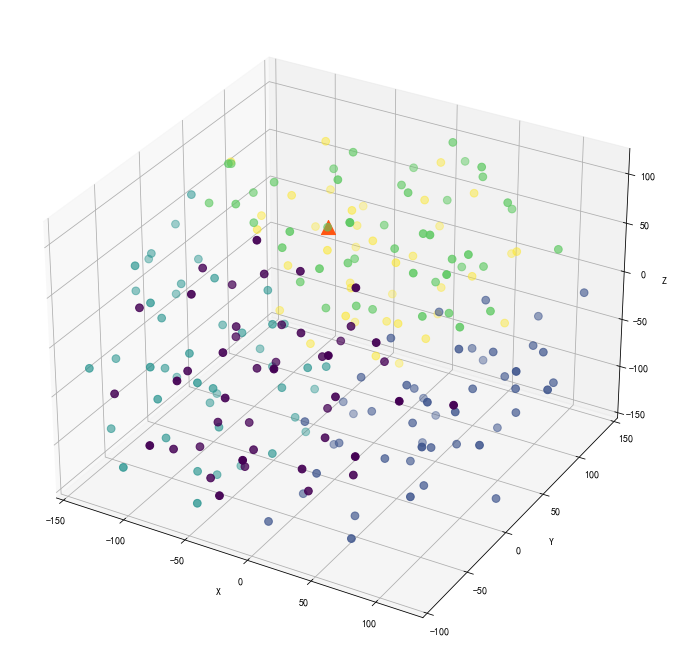

In [192]:
# 三维散点图
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection="3d")


ax.scatter(tsneret[:,0], tsneret[:,1], tsneret[:,2], c=clus, marker="o", s=60)
ax.scatter(tsneret[-1,0], tsneret[-1,1], tsneret[-1,2], c="#FF5511",  marker="^",s=200, label="1389163_at")

ax.set(xlabel="X", ylabel="Y", zlabel="Z")
ax.set_xlim(-150, 130)
ax.set_ylim(-100, 150)
ax.set_zlim(-150, 120)


plt.show()


### 降维

In [149]:
import matplotlib.pyplot as plt
from TSNE import tsne

tsX = decomposed[:,:-1]
tsY = decomposed[:,-1]

tse_err = []
for i in range(2,50):
    data_2d, tse_tmp_err = tsne(tsX, i)
    # plt.scatter(data_2d[:, 0], data_2d[:, 1], c = tsY>0)
    # plt.show()
    tse_err.append(tse_tmp_err)

Computing pairwise distances...
Computing pair_prob for point 0 of 120 ...
Mean value of sigma:  1.341995810789995
T-SNE DURING:318.1875
Iteration  100 : error is  10.96856491674117
Iteration  200 : error is  0.2666726672944329
ratio  0.02431244828458954
Iteration  300 : error is  0.22422002170274524
ratio  0.8408061612673047
Iteration  400 : error is  0.2242130973827155
ratio  0.9999691181903508
finished training!
Computing pairwise distances...
Computing pair_prob for point 0 of 120 ...
Mean value of sigma:  1.341995810789995
T-SNE DURING:319.53125
Iteration  100 : error is  9.834941947525463
Iteration  200 : error is  0.1997765262559578
ratio  0.020312933957502707
Iteration  300 : error is  0.1776324408796423
ratio  0.8891557191862269
Iteration  400 : error is  0.17716671867363556
ratio  0.9973781691919535
finished training!
Computing pairwise distances...
Computing pair_prob for point 0 of 120 ...
Mean value of sigma:  1.341995810789995
T-SNE DURING:320.84375
Iteration  100 : error

KeyboardInterrupt: 

In [ ]:
tse_err

In [ ]:
from sklearn.manifold import TSNE

tsX = decomposed[:,:-1]
tsY = decomposed[:,-1]

sktsne = TSNE(n_components=3)
sktsne.fit_transform(tsX)

In [ ]:
from KPCA import *
from sklearn.decomposition import KernelPCA
from sklearn.metrics import mean_squared_error  # 均方误差

kernels = ["linear", "cosine"]
mse = list()  # 同一核函数不同主成分下的均方误差
 
for kernel in kernels:
    for i in range(2,100):
        kpca = KernelPCA(n_components=int(i), kernel=kernel, fit_inverse_transform=True)
        X_reduced = kpca.fit_transform(tsX)
        X_back = kpca.inverse_transform(X_reduced)
        mse.append(mean_squared_error(X_back, tsX))
print(len(mse))
mse_linear = mse[:int(len(mse)/2)]  #线性核函数的均方误差
mse_cosine = mse[int(len(mse)/2):]  #余弦核函数的均方误差

196


In [ ]:
print(mse_linear)
print(mse_cosine)

### 筛选后的数据做特征选择

In [ ]:
decomposeddf = pd.DataFrame(decomposed_label.T)
decomposedata = pd.DataFrame(decomposed)

In [ ]:
decomposeddf = decomposeddf.append(decomposedata)

In [ ]:
decomposeddf

,0,1,2,3,4,5,6,7,8,9,...,501,502,503,504,505,506,507,508,509,510
0,1367515_at,1367539_at,1367541_at,1367837_at,1367930_at,1367980_at,1368060_at,1368136_at,1368326_at,1368356_a_at,...,1395581_at,1395619_at,1396696_at,1396930_x_at,1397446_at,1397554_at,1397946_at,1398500_at,1398601_at,1389163_at
0,0.691707,-0.149962,0.068355,-0.41012,-0.15684,0.430398,-0.016773,-0.296083,-0.334933,-0.088954,...,0.402824,-0.278339,-0.165162,0.213689,0.783755,-0.14091,-0.193995,0.539035,0.148272,-0.047624
1,-0.244934,0.557167,-0.096006,-0.71703,-0.763452,-0.087327,0.999472,0.350021,-0.078162,-0.577547,...,0.838225,-0.241364,0.211239,0.068993,0.046405,-0.527346,0.014322,-0.466492,-0.074136,-0.853129
2,-0.052803,-0.632396,-0.065188,-0.250271,-0.067167,-0.948124,-0.851828,-0.290366,-0.499654,0.254717,...,0.560309,-0.044164,0.010059,1.163653,0.327038,-0.851117,-0.121886,-0.33289,0.099451,0.007928
3,1.716409,0.563776,1.008293,0.990159,1.531125,1.004263,0.255013,0.744544,0.580723,1.14495,...,0.407456,-0.541271,0.827757,0.16336,-0.327772,0.470077,-1.167478,1.214074,1.216917,0.813432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.680385,1.680643,1.362696,1.399373,0.513071,0.935649,1.243686,1.693688,2.47986,1.906823,...,1.139301,-1.449211,2.70976,-1.182946,-1.384273,1.577164,-0.742831,1.685194,0.777525,0.139864
116,0.419521,0.537341,0.576846,0.408308,0.602744,0.854559,0.983716,1.647946,-0.175057,0.598388,...,0.500094,0.054435,0.561681,-0.006501,0.778252,0.40219,-0.274117,0.609351,0.636486,0.591224
117,0.743743,1.409687,0.119718,0.190913,0.655493,0.461587,0.290464,1.030431,0.803581,0.656357,...,0.291657,-1.457427,0.925102,-1.31506,-0.047139,1.608497,-0.818947,1.136725,0.848045,0.855096
118,1.115998,1.773165,1.681145,1.456919,1.810694,0.829609,1.4879,1.499285,2.257002,1.745339,...,2.09811,0.403643,1.350175,0.295474,-0.575389,1.300392,-0.522496,2.082483,1.162671,1.389785


#### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

decomposedata.columns = decomposed_label.T.tolist()

In [ ]:
decomposedata.head()

,1367515_at,1367539_at,1367541_at,1367837_at,1367930_at,1367980_at,1368060_at,1368136_at,1368326_at,1368356_a_at,...,1395581_at,1395619_at,1396696_at,1396930_x_at,1397446_at,1397554_at,1397946_at,1398500_at,1398601_at,1389163_at
0,0.691707,-0.149962,0.068355,-0.410120,-0.156840,0.430398,-0.016773,-0.296083,-0.334933,-0.088954,...,0.402824,-0.278339,-0.165162,0.213689,0.783755,-0.140910,-0.193995,0.539035,0.148272,-0.047624
1,-0.244934,0.557167,-0.096006,-0.717030,-0.763452,-0.087327,0.999472,0.350021,-0.078162,-0.577547,...,0.838225,-0.241364,0.211239,0.068993,0.046405,-0.527346,0.014322,-0.466492,-0.074136,-0.853129
2,-0.052803,-0.632396,-0.065188,-0.250271,-0.067167,-0.948124,-0.851828,-0.290366,-0.499654,0.254717,...,0.560309,-0.044164,0.010059,1.163653,0.327038,-0.851117,-0.121886,-0.332890,0.099451,0.007928
3,1.716409,0.563776,1.008293,0.990159,1.531125,1.004263,0.255013,0.744544,0.580723,1.144950,...,0.407456,-0.541271,0.827757,0.163360,-0.327772,0.470077,-1.167478,1.214074,1.216917,0.813432
4,0.251406,0.914036,-0.470953,-0.103209,-0.151565,0.792183,0.195929,-0.044503,0.004199,0.217451,...,1.171724,-0.044164,-0.106755,-0.006501,-0.812001,0.235082,-0.430355,-0.811043,0.397804,-0.228168


#### GradientBoostingRegressor！！

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

bfx, bfy = decomposedata.iloc[:,:-1], decomposedata.iloc[:,-1]
bx_train, bx_test, by_train, by_test = train_test_split(bfx, bfy, test_size = 0.2, random_state = 0)
bfeat_labels = decomposedata.columns[:-1]
boost = GradientBoostingRegressor(n_estimators=500)
boost.fit(bfx, bfy)

GradientBoostingRegressor(n_estimators=500)

In [ ]:
bimportances = boost.feature_importances_
bindices = np.argsort(bimportances)[::-1]
for f in range(bfx.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, bfeat_labels[bindices[f]][0], bimportances[bindices[f]]))


 1) 1397446_at                     0.078590
 2) 1379625_at                     0.076388
 3) 1368136_at                     0.068494
 4) 1391408_a_at                   0.063596
 5) 1377836_at                     0.058163
 6) 1387533_at                     0.051547
 7) 1390574_at                     0.038592
 8) 1390272_at                     0.033184
 9) 1393231_at                     0.020676
10) 1383249_at                     0.019176
11) 1371551_at                     0.018228
12) 1380827_at                     0.017443
13) 1373165_at                     0.017243
14) 1382263_at                     0.016805
15) 1390201_at                     0.016096
16) 1377194_a_at                   0.015526
17) 1398795_at                     0.015251
18) 1392506_at                     0.015084
19) 1387781_at                     0.014832
20) 1385883_at                     0.014438
21) 1379767_at                     0.014089
22) 1393510_at                     0.013897
23) 1389329_at                  

In [ ]:
bfeat_labels_list = bfeat_labels[bindices].to_list()
bfeat_labels_array = np.array([it[0] for it in bfeat_labels_list])
bfeat_labels_chosen = bfeat_labels_array[:int(len(bfeat_labels_array)/10)]
bfeat_labels_chosen = bfeat_labels_chosen.tolist()
bfeat_labels_chosen.append(hyb)
bfeat_labels_chosen = np.array(bfeat_labels_chosen)
bfeat_labels_chosen.shape

(52,)

In [ ]:
ret = []
for it in bfeat_labels_chosen:
    ret.append(data[:,np.where(full_label==it)[0]])
print(ret)
gbdt28 = np.asarray(ret).reshape(int(len(bfeat_labels_array)/10)+1,-1).T
gbdt28.shape

In [ ]:
dfgbdt28 = pd.DataFrame(gbdt28)
dfgbdt28.columns = bfeat_labels_chosen
dfgbdt28

In [ ]:
decomposeddf.to_csv("gbdt28.csv",index=False,header=None,sep=",")

#### RandomForestRegressor!!

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfx, rfy = decomposedata.iloc[:,:-1], decomposedata.iloc[:,-1]
bx_train, bx_test, by_train, by_test = train_test_split(bfx, bfy, test_size = 0.2, random_state = 0)
rfeat_labels = decomposedata.columns[:-1]
rfmodel = RandomForestRegressor(n_estimators=1000)
rfmodel.fit(rfx, rfy)

RandomForestRegressor(n_estimators=1000)

In [ ]:
rimportances = rfmodel.feature_importances_
rindices = np.argsort(rimportances)[::-1]
for f in range(bx_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, rfeat_labels[rindices[f]], rimportances[rindices[f]]))

 1) ('1390272_at',)                0.029360
 2) ('1368136_at',)                0.025527
 3) ('1376254_at',)                0.021102
 4) ('1393510_at',)                0.018255
 5) ('1381867_at',)                0.017116
 6) ('1373534_at',)                0.017015
 7) ('1377836_at',)                0.016699
 8) ('1385811_at',)                0.016561
 9) ('1394166_at',)                0.016037
10) ('1389275_at',)                0.015581
11) ('1391796_at',)                0.015487
12) ('1385319_at',)                0.014784
13) ('1375833_at',)                0.014459
14) ('1387533_at',)                0.013560
15) ('1377194_a_at',)              0.013323
16) ('1390574_at',)                0.012482
17) ('1372928_at',)                0.012221
18) ('1389978_at',)                0.012126
19) ('1379728_at',)                0.011995
20) ('1371551_at',)                0.011543
21) ('1370966_at',)                0.011368
22) ('1373327_at',)                0.011300
23) ('1375327_at',)             

#### Lasso

In [ ]:
from sklearn.linear_model import Lasso


lfx, lfy = decomposedata.iloc[:,:-1], decomposedata.iloc[:,-1]
lx_train, lx_test, ly_train, ly_test = train_test_split(lfx, lfy, test_size = 0.2, random_state = 0)

lasso = Lasso(0.1)  #调用Lasso()函数，设置λ的值为1000
lasso.fit(lx_train,ly_train)

print('相关系数为：',np.round(lasso.coef_,5))  #输出结果，保留五位小数

## 计算相关系数非零的个数
print('相关系数非零个数为：',np.sum(lasso.coef_ != 0))

mask = lasso.coef_ != 0  #返回一个相关系数是否为零的布尔数组
#print('输出数据的维度为：',new_reg_data.shape)  #查看输出数据的维度

### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
params = {'learning_rate': 0.08, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 100}

xgbx, xgby = decomposedata.iloc[:,:-1], decomposedata.iloc[:,-1]
xx_train, xx_test, xy_train, xy_test = train_test_split(xgbx, xgby, test_size = 0.1)
# dtrain = xgb.DMatrix(xx_train, label = xy_train)
# dtest = xgb.DMatrix(xx_test, label = xy_test)
xgb_feat_labels = decomposedata.columns[:-1]

xgbmodel = xgb.XGBRegressor(learning_rate=0.08, max_depth=5, min_child_weight=6, n_estimators=100)
xgbmodel.fit(xx_train, xy_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=6,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
xgb_importances = xgbmodel.feature_importances_
xgb_indices  = np.argsort(xgb_importances)[::-1]
xgb_above_aver = []
xgb_dict = {}
for f in range(xx_train.shape[1]):
    if xgb_importances[xgb_indices[f]]>0.01:
        xgb_above_aver.append(decomposed_label[xgb_indices[f]][0])
    xgb_dict.update({ str(decomposed_label[xgb_indices[f]]):xgb_importances[xgb_indices[f]]})
    print("%2d) %-*s %f" % (f + 1, 30, decomposed_label[xgb_indices[f]], xgb_importances[xgb_indices[f]]))

 1) ['1368136_at']                 0.081589
 2) ['1393231_at']                 0.074503
 3) ['1382223_at']                 0.058223
 4) ['1373398_at']                 0.049039
 5) ['1373887_at']                 0.027063
 6) ['1391126_at']                 0.026390
 7) ['1372453_at']                 0.024984
 8) ['1372921_at']                 0.024330
 9) ['1377836_at']                 0.022407
10) ['1384466_at']                 0.020854
11) ['1382179_at']                 0.020250
12) ['1376180_at']                 0.019358
13) ['1374323_at']                 0.014918
14) ['1377194_a_at']               0.014442
15) ['1375872_at']                 0.014356
16) ['1398795_at']                 0.014323
17) ['1385046_at']                 0.013695
18) ['1375207_at']                 0.013439
19) ['1383299_at']                 0.012857
20) ['1372085_at']                 0.011721
21) ['1395581_at']                 0.011698
22) ['1372463_at']                 0.011550
23) ['1372163_at']              

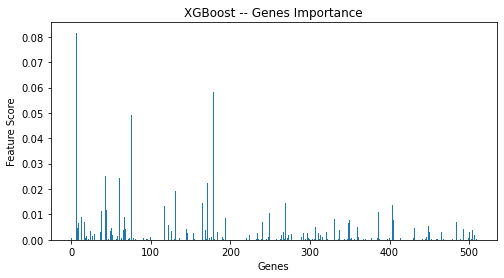

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.bar(range(len(xgb_importances)), xgb_importances)
plt.xlabel("Genes")
plt.ylabel("Feature Score")
plt.title("XGBoost -- Genes Importance")
plt.savefig("xbg1")
plt.show()

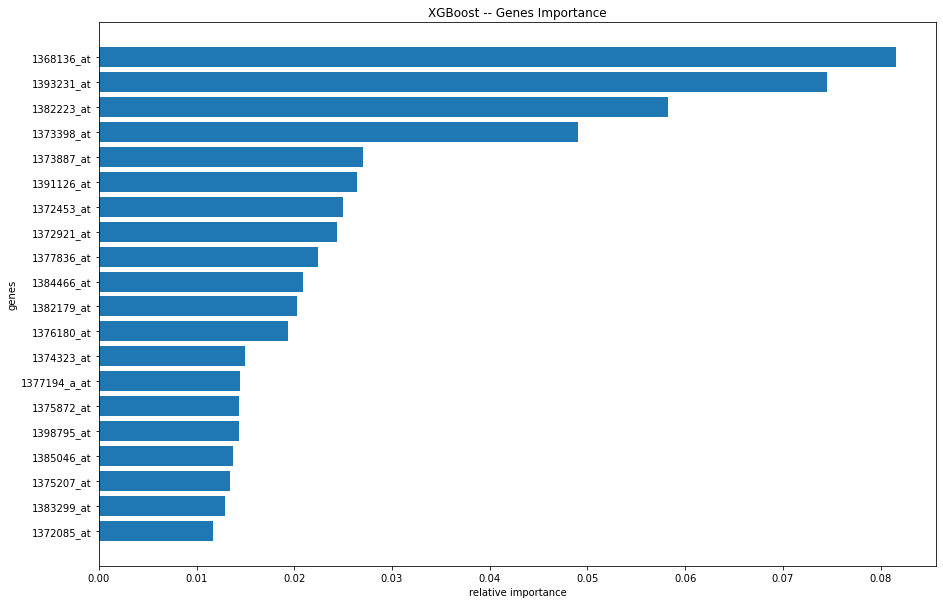

In [ ]:
xgb_plot_x, xgb_plot_y = [],[]
for f in range(20):
    xgb_plot_x.append(decomposed_label[xgb_indices[f]][0])
    xgb_plot_y.append(xgb_importances[xgb_indices[f]])
xgb_plot_x.reverse()
xgb_plot_y.reverse()
plt.figure(figsize=(15,10))
plt.barh(xgb_plot_x, xgb_plot_y)
plt.ylabel("genes")
plt.xlabel("relative importance")
plt.title("XGBoost -- Genes Importance")
plt.savefig("xbg2")
plt.show()

In [ ]:
# 可视化

# xbg_labels_list = decomposed_label[xgb_indices]
# xbg_labels_chosen = xbg_labels_list[:15].tolist()

# plt.figure()
# plt.barh(xbg_labels_chosen, xgb_importances[xgb_indices[:15]], 0.6, align='center')
# plt.grid(ls=':', color='gray', alpha=0.4)
# plt.title("Xgboost Feature Importance")
# # 添加数据标签
# # for a, b in enumerate(rf_score[:30][::-1]):
# #     plt.text(b+0.1, a-0.6/2, '%s' % b, ha='center', va='bottom')

# plt.savefig("前15名特征")
# plt.show()
# xgbmodel.
# xgb.plot_importance(xgbmodel)
# plt.show()

In [ ]:
# xgboost网格搜索调参
gsCv = GridSearchCV(xgbmodel,
                {'max_depth':list(range(4, 10, 1)),
                 'learning_rate':[0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2],
                 'min_child_weight':list(range(4, 8, 2)),
                 'n_estimators':list(range(10, 101, 20))})

{'learning_rate': 0.06, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 70}
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.039583      0.001125         0.012508        0.000415   
1         0.083700      0.004802         0.011670        0.000611   
2         0.138494      0.007710         0.012961        0.001152   
3         0.172385      0.006640         0.012915        0.001536   
4         0.203036      0.003184         0.011192        0.000695   
..             ...           ...              ...             ...   
535       0.046215      0.003748         0.014148        0.001374   
536       0.107851      0.005758         0.012968        0.002898   
537       0.167301      0.004103         0.013406        0.001729   
538       0.232710      0.005873         0.014459        0.001741   
539       0.286646      0.011251         0.012361        0.002166   

    param_learning_rate param_max_depth param_min_child_weight  \
0                  0.0

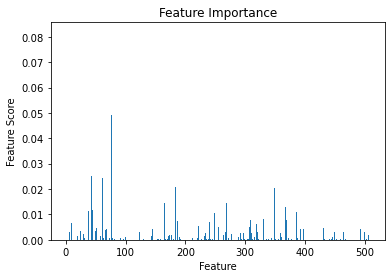

In [ ]:
gsCv.fit(xgbx, xgby)
print(gsCv.best_params_)
cv_results = pd.DataFrame(gsCv.cv_results_)
print(cv_results)
 
# 可视化
plt.figure()
plt.bar(range(len(xgbmodel.feature_importances_)), xgbmodel.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Feature Score")
plt.title("Feature Importance")
plt.savefig("Xgboost")
 
# 可视化
# plt.figure()
# plt.barh(label[::-1], x_score[:30][::-1], 0.6, align='center')
# plt.grid(ls=':', color='gray', alpha=0.4)
# plt.title("Xgboost Feature Importance")
# 添加数据标签
# for a, b in enumerate(rf_score[:30][::-1]):
#     plt.text(b+0.1, a-0.6/2, '%s' % b, ha='center', va='bottom')
 
# plt.savefig("前30名特征")
plt.show()

In [ ]:
#full_label = np.array(full_label,dtype=str)
xgb_above_aver_pos = []
for sig in xgb_above_aver:
    print(sig)
    xgb_above_aver_pos.append(np.where(full_label==sig)[0][0])
len(xgb_above_aver_pos)

1368136_at
1393231_at
1382223_at
1373398_at
1373887_at
1391126_at
1372453_at
1372921_at
1377836_at
1384466_at
1382179_at
1376180_at
1374323_at
1377194_a_at
1375872_at
1398795_at
1385046_at
1375207_at
1383299_at
1372085_at
1395581_at
1372463_at
1372163_at
1384029_at
1390539_at


25

In [ ]:
# 根据相关性筛选
xgb_above_aver_pos.append(18975)
xgb_above_aver_pos = sorted(xgb_above_aver_pos)
xgb_decomposed = data[:,xgb_above_aver_pos]

In [ ]:
xgb_decomposed_label = full_label[xgb_above_aver_pos]

In [ ]:
xgb_decomposed_data = pd.DataFrame(xgb_decomposed)
xgb_decomposed_data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.296083,-0.126668,-0.404229,0.168343,0.218632,0.340286,-0.206771,0.295206,-0.151284,-0.256104,...,-0.145279,-0.647034,0.533941,0.030756,-0.749209,0.526255,0.789270,0.742728,0.402824,-0.047624
1,0.350021,0.519215,-1.648009,0.429847,1.322483,-2.188119,-0.828422,-0.466409,0.892778,-0.843589,...,-0.223794,0.493699,-0.775423,-0.473616,-0.521613,-1.117737,-0.185144,0.070648,0.838225,-0.853129
2,-0.290366,-0.476978,-1.366145,-0.053935,-0.282576,-0.508451,0.302341,0.212004,-0.276800,0.336081,...,-0.158365,-0.270327,-0.149383,-0.749819,-0.771969,-0.276525,-0.613096,-0.181809,0.560309,0.007928
3,0.744544,0.623214,1.170630,1.292809,0.594538,2.031825,2.038678,1.728835,0.510526,-1.214880,...,0.993181,0.976520,1.131338,1.023487,-0.585340,1.311955,1.108588,0.841664,0.407456,0.813432
4,-0.044503,0.864051,-0.748729,-0.590018,0.314100,-0.532192,-0.158539,0.583212,0.790084,0.223283,...,0.129522,0.116991,-0.411256,0.018747,-0.316776,0.214537,-1.133222,0.234404,1.171724,-0.228168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.693688,2.144871,1.837261,2.482652,1.179280,1.545136,1.754647,1.204024,1.257915,-1.642569,...,1.127310,2.547018,1.781928,1.916145,1.859045,2.097655,1.342315,2.298406,1.139301,0.139864
116,1.647946,0.256483,0.504000,0.894016,1.250882,0.631112,-0.217489,0.538411,0.704505,0.580474,...,1.074967,1.273642,0.173866,0.603178,1.048802,0.543336,-0.543965,0.483449,0.500094,0.591224
117,1.030431,0.732685,1.278007,0.658663,0.385701,1.622294,0.195159,1.728835,0.744441,-1.374675,...,1.425010,0.912852,0.574859,0.879381,0.406980,0.167566,0.341566,0.524387,0.291657,0.855096
118,1.499285,1.269097,2.114651,1.796204,1.065912,1.996213,1.191946,0.679214,1.275031,-0.881188,...,1.205824,2.207451,1.933324,2.200355,1.403852,1.973822,1.039457,1.796905,2.098110,1.389785


In [ ]:
xgb_decomposed_data.to_csv("26genes.csv")

In [ ]:
xgbx2, xgby2 = xgb_decomposed_data.iloc[:,:-1], xgb_decomposed_data.iloc[:,-1]

### 基于Kpca的降维

In [ ]:
from KPCA import *
from sklearn.decomposition import KernelPCA
from sklearn.metrics import mean_squared_error  # 均方误差

kernels = ["linear", "cosine"]
mse = list()  # 同一核函数不同主成分下的均方误差
 
for kernel in kernels:
    for i in range(1,25):
        kpca = KernelPCA(n_components=int(i), kernel=kernel, fit_inverse_transform=True)
        X_reduced = kpca.fit_transform(xgbx2)
        X_back = kpca.inverse_transform(X_reduced)
        mse.append(mean_squared_error(X_back, xgbx2))
print(len(mse))
mse_linear = mse[:int(len(mse)/2)]  #线性核函数的均方误差
mse_cosine = mse[int(len(mse)/2):]  #余弦核函数的均方误差

plt.bar(range(int(len(mse)/2)),mse_linear)
plt.ylabel("Adjusted_R2")
plt.xlabel("number of principal components")
plt.savefig("kpca1")
plt.show()

step = (np.array(mse_linear[:-1]) - np.array(mse_linear[1:]))
plt.bar(range(len(step)), step)
plt.ylabel("change rate of Adjusted_R2")
plt.xlabel("number of principal components")
plt.savefig("kpca2")
plt.show()

### 增加惩罚项的R2

48


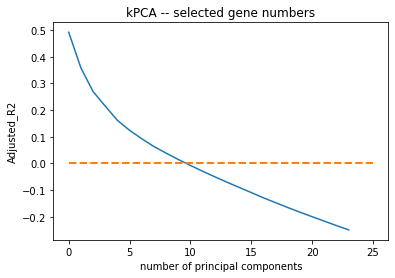

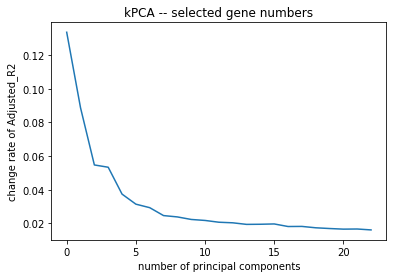

In [ ]:
from KPCA import *
from sklearn.decomposition import KernelPCA
from sklearn.metrics import mean_squared_error,r2_score

kernels = ["linear", "cosine"]
mse = list()  # 同一核函数不同主成分下的均方误差
n = 120

for kernel in kernels:
    for i in range(1,25):
        kpca = KernelPCA(n_components=int(i), kernel=kernel, fit_inverse_transform=True)
        X_reduced = kpca.fit_transform(xgbx2)
        X_back = kpca.inverse_transform(X_reduced)
        R_squ = 1-r2_score(X_back, xgbx2)
        #R_mean = mean_squared_error(X_back, xgbx2)

        R_adj = 1 -(1-R_squ)*(n-1)/(n-i-1)
        mse.append(R_adj)

print(len(mse))
mse_linear = mse[:int(len(mse)/2)]  #线性核函数的均方误差
mse_cosine = mse[int(len(mse)/2):]  #余弦核函数的均方误差

plt.plot(range(int(len(mse)/2)),mse_linear)
plt.plot([0,25], [0,0], "--",linewidth=2)
plt.ylabel("Adjusted_R2")
plt.xlabel("number of principal components")
plt.title("kPCA -- selected gene numbers")
plt.savefig("kpca1")
plt.show()

step = (np.array(mse_linear[:-1]) - np.array(mse_linear[1:]))
plt.plot(range(len(step)), step)
plt.ylabel("change rate of Adjusted_R2")
plt.xlabel("number of principal components")
plt.title("kPCA -- selected gene numbers")
plt.savefig("kpca2")
plt.show()

### RFE

In [ ]:
from sklearn.feature_selection import RFE

xgbx2, xgby2 = xgb_decomposed_data.iloc[:,:-1], xgb_decomposed_data.iloc[:,-1]
x_slt = xgbx2
y_slt = xgby2

M = xgbx2.shape[1]

for n in range(1,M-10):
    print(x_slt.shape[1])
    selector = RFE(xgbmodel, n_features_to_select=M-n,step=1).fit(x_slt,y_slt)
    slt = selector.support_

    F_slt = np.where(slt==True)
    x_slt = x_slt[x_slt.columns[F_slt]]


25
24
23
22
21
20
19
18
17
16
15
14
13
12


In [ ]:
x_slt.columns.to_list()

[0, 1, 5, 7, 12, 14, 17, 20, 22, 23, 24]

In [ ]:
rfe_decomposed_label = xgb_decomposed_label[x_slt.columns.to_list()]
rfe_decomposed_label = np.array(rfe_decomposed_label,dtype=str)

In [ ]:
rfe_decomposed_dict = {}
for it in rfe_decomposed_label:
    rfe_decomposed_dict.update({it[0]:xgb_dict[str(it)]})

rfe_decomposed_sorted = sorted(rfe_decomposed_dict.items(),key=lambda x:x[1],reverse=True)

In [ ]:
rfe_decomposed_sorted

[('1368136_at', 0.08158867),
 ('1393231_at', 0.07450318),
 ('1382223_at', 0.058222797),
 ('1373887_at', 0.027062949),
 ('1391126_at', 0.026390161),
 ('1372921_at', 0.02432973),
 ('1377194_a_at', 0.014441502),
 ('1398795_at', 0.01432289),
 ('1372085_at', 0.011720907),
 ('1395581_at', 0.011698255),
 ('1384029_at', 0.010822368)]

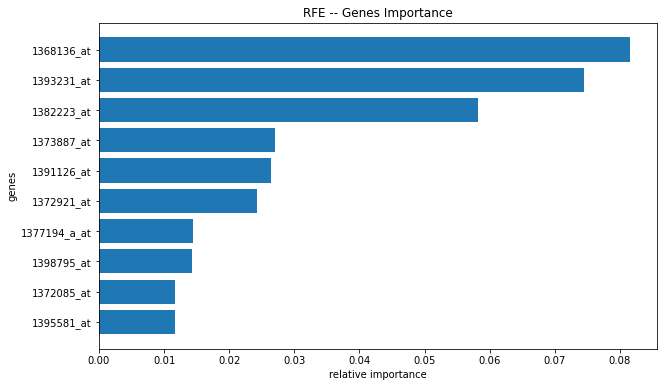

In [ ]:
rfe_plot_x, rfe_plot_y = [],[]
for f in range(10):
    rfe_plot_x.append(rfe_decomposed_sorted[f][0])
    rfe_plot_y.append(rfe_decomposed_sorted[f][1])
rfe_plot_x.reverse()
rfe_plot_y.reverse()
plt.figure(figsize=(10,6))
plt.barh(rfe_plot_x, rfe_plot_y)
plt.ylabel("genes")
plt.xlabel("relative importance")
plt.title("RFE -- Genes Importance")
plt.savefig("rfe")
plt.show()

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

xgbx2, xgby2 = xgb_decomposed_data.iloc[:,:-1], xgb_decomposed_data.iloc[:,-1]
# estimator = SVR(kernel="linear")

# 5折交叉
selector = RFECV(estimator=xgbmodel, step=1, cv=5)
selector = selector.fit(xgbx2, xgby2)

# 哪些特征入选最后特征，true表示入选
print(selector.support_)

# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
print(selector.ranking_)

#  挑选了几个特征
print(selector.n_features_)
# 每次交叉迭代各个特征得分
print(selector.grid_scores_)

[ True  True False False False  True False  True False False False False
 False False  True False False  True False False  True False  True  True
  True]
[ 1  1 13 12  6  1  3  1 14 11 10  7  2  9  1  8  5  1  4 16  1 15  1  1
  1]
10
[0.13445976 0.22114711 0.34125707 0.33393043 0.36796481 0.38182399
 0.43315715 0.43450083 0.39416554 0.4528045  0.40511561 0.4293197
 0.42898946 0.38619022 0.40535294 0.37096416 0.37470659 0.36758624
 0.38867439 0.3718481  0.35341999 0.35378671 0.3679051  0.37770223
 0.38788427]


In [ ]:
xgbx2, xgby2 = xgb_decomposed_data.iloc[:,:-1], xgb_decomposed_data.iloc[:,-1]
# estimator = SVR(kernel="linear")

# 5折交叉
selectorr = RFECV(estimator=xgbmodel, step=1, cv=5)
selectorr = selectorr.fit(xgbx2, xgby2)

# 哪些特征入选最后特征，true表示入选
print(selectorr.support_)

# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
print(selectorr.ranking_)

#  挑选了几个特征
print(selectorr.n_features_)
# 每次交叉迭代各个特征得分
print(selectorr.grid_scores_)

[ True  True False False False  True False  True False False False False
 False False  True False False  True False False  True False  True  True
  True]
[ 1  1 13 12  6  1  3  1 14 11 10  7  2  9  1  8  5  1  4 16  1 15  1  1
  1]
10
[0.13445976 0.22114711 0.34125707 0.33393043 0.36796481 0.38182399
 0.43315715 0.43450083 0.39416554 0.4528045  0.40511561 0.4293197
 0.42898946 0.38619022 0.40535294 0.37096416 0.37470659 0.36758624
 0.38867439 0.3718481  0.35341999 0.35378671 0.3679051  0.37770223
 0.38788427]


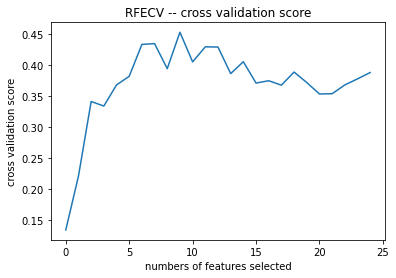

In [ ]:
plt.plot(range(25),selectorr.grid_scores_)
plt.xlabel("numbers of features selected")
plt.ylabel("cross validation score")
plt.title("RFECV -- cross validation score")
plt.savefig("cv_score")

In [ ]:
selector.ranking_

array([ 1,  1, 13, 12,  6,  1,  3,  1, 14, 11, 10,  7,  2,  9,  1,  8,  5,
        1,  4, 16,  1, 15,  1,  1,  1])

In [ ]:
rfecv_decomposed_label = xgb_decomposed_label[:-1][selector.support_]
rfecv_decomposed_label = np.array(rfecv_decomposed_label,dtype=str).tolist()

In [ ]:
rfecv_decomposed_dict = {}
for it in rfecv_decomposed_label:
    rfecv_decomposed_dict.update({it[0]:xgb_dict[str(it)]})

rfecv_decomposed_sorted = sorted(rfecv_decomposed_dict.items(),key=lambda x:x[1],reverse=True)

In [ ]:
rfecv_decomposed_sorted

[('1368136_at', 0.08158867),
 ('1393231_at', 0.07450318),
 ('1382223_at', 0.058222797),
 ('1373887_at', 0.027062949),
 ('1391126_at', 0.026390161),
 ('1372921_at', 0.02432973),
 ('1398795_at', 0.01432289),
 ('1372085_at', 0.011720907),
 ('1395581_at', 0.011698255),
 ('1384029_at', 0.010822368)]

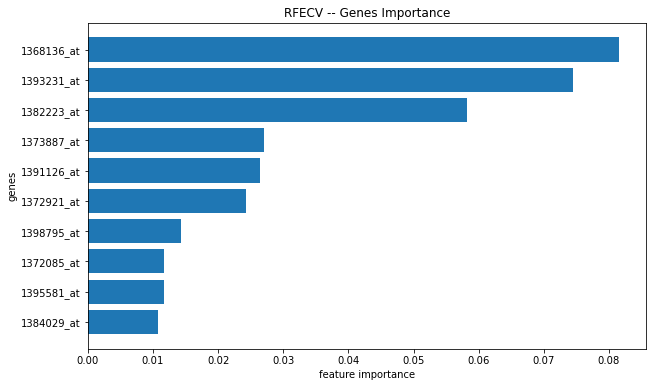

In [ ]:
rfecv_plot_x, rfecv_plot_y = [],[]
for f in range(10):
    rfecv_plot_x.append(rfecv_decomposed_sorted[f][0])
    rfecv_plot_y.append(rfecv_decomposed_sorted[f][1])
rfecv_plot_x.reverse()
rfecv_plot_y.reverse()
plt.figure(figsize=(10,6))
plt.barh(rfecv_plot_x, rfecv_plot_y)
plt.ylabel("genes")
plt.title("RFECV -- Genes Importance")
plt.xlabel("feature importance")
plt.savefig("rfecv")
plt.show()

In [ ]:
rfecv_plot_x.reverse()

In [ ]:
import seaborn as sns

heat_data = np.array(data[:,-1])

for gene in rfecv_plot_x:
    print(gene)
    heat_data = np.column_stack((heat_data,data[:,np.where(full_label==gene)[0]]))



In [ ]:
heat_data.shape

(120, 15)

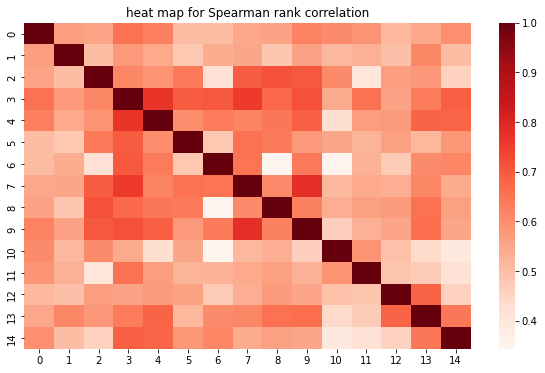

In [ ]:
heat_df = pd.DataFrame(heat_data)
heat_label = ["hyb"]+list(range(0,14))


plt.figure(figsize=(10,6))
sns.heatmap(heat_df.corr("spearman"),cmap='Reds')
plt.title("heat map for Spearman rank correlation")
plt.savefig("heatmap_sp")
plt.show()

In [ ]:
spline = heat_df.corr("spearman").to_numpy()[0][1:]
spline = spline.reshape(1,-1)

In [ ]:
mutline = []
for gene in rfecv_plot_x[:-1]:
    mutline.append(mut_selector.scores_[np.where(full_label==gene)[0]])

mutline = np.array(mutline).reshape(1,-1)

In [ ]:
mutline

array([[0.26053725, 0.30711933, 0.31736522, 0.25503561, 0.18651996,
        0.24821134, 0.28000604, 0.23161716, 0.22500915, 0.2767952 ,
        0.18542847, 0.2572947 , 0.17030751, 0.28199436]])

In [ ]:
micline = []
for gene in rfecv_plot_x[:-1]:
    micline.append(MIC[int(np.where(full_label==gene)[0])])

micline = np.array(micline).reshape(1,-1)

In [ ]:
table_four_line = pd.DataFrame()
table_four_line = table_four_line.append(pd.DataFrame(spline))
table_four_line = table_four_line.append(pd.DataFrame(mutline))
table_four_line = table_four_line.append(pd.DataFrame(micline))

In [ ]:
rfecv_plot_x

In [ ]:
table_four_line.columns = rfecv_plot_x[:-1]

In [ ]:
table_four_line.index = ["Spearman","MI","MIC"]

In [ ]:
table_four_line

,1382223_at,1368136_at,1393231_at,1376180_at,1374692_at,1391126_at,1387018_at,1398795_at,1372921_at,1377836_at,1390653_at,1395581_at,1367795_at,1377194_a_at
Spearman,0.565791,0.555408,0.653914,0.626331,0.503083,0.506963,0.548304,0.557355,0.622739,0.604391,0.583792,0.510124,0.547763,0.596470
MI,0.260537,0.307119,0.317365,0.255036,0.186520,0.248211,0.280006,0.231617,0.225009,0.276795,0.185428,0.257295,0.170308,0.281994
MIC,0.382228,0.407314,0.437165,0.491932,0.365131,0.373367,0.390376,0.415403,0.408988,0.568740,0.406141,0.420374,0.397259,0.414591


In [ ]:
table_four_line.to_csv("four.csv")